In [7]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib notebook
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError

In [8]:
#plotfile_path = './../Injection_p2/InjectionBelowRstar_plus_3dR/plasma_injection/removeparticleinsiderstar_plus_3dR/diags/'
#plotfile_path2 = plotfile_path

#plotfile_path = './noParticleInjection/CorotatingE_3cells_outside_Rstar/'
#plotfile_path = './InjectionBelowRstar/plasma_injection/OnlyTheoryEBAtParticleLocation/diags/'
#plotfile_path = './InjectionBelowRstar/plasma_injection/OnlyTheoryEBAtParticleLocation/withoutmonopoleE/diags/'
#plotfile_path = './InjectionBelowRstar/plasma_injection/SelfconsistentEB_AddMonopole/limit_theta_injection45to65_withmonopole/do_nodal/diags/'
plotfile_path = './diags/'
plotfile_path2 = plotfile_path

#plotfile_path = './InjectionFraction_p4/RampOmega/180k/nx512_dx351/Conductivity_macroscopic/sigma_within_rstar_minus_sigma/diags/'
#plotfile_path2 = plotfile_path


############ Plot comparison of rho and rhoGJ on surface and along equator ############
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError


def x_center(field,data):
    xc = YTQuantity(90000, 'm')   
    return xc

def y_center(field,data):
    yc = YTQuantity(90000, 'm')
    return yc

def z_center(field,data):
    zc = YTQuantity(90000, 'm')
    return zc

def dR_star(field,data):
    dR = 15.625
    return dR

############# Functions needed to compute theoretical rhoGJ ################
def r_cl(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']

    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc))**0.5

    return r

def rad(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']

    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5

    return r

def thetaval(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']

    thetaval = np.arccos((data['boxlib',"z"]-zc)/(data['boxlib',"rad"]))

    return thetaval


def thetadeg(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']

    thetadeg = np.arccos((data['boxlib',"z"]-zc)/(data['boxlib',"rad"])) * 180/3.14

    return thetadeg

def rho_GJ(field,data):
 
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')

    omega = 6245.676
    B = 8.0323e-6
    epsilon = 8.8541878128e-12
    c_theta = (data['boxlib',"z"]-zc)/data['boxlib',"rad"]
#    s_theta = data['boxlib',"r_cl"].d/data['boxlib',"rad"].d
#    r_ratio = r_star.d/data['boxlib',"rad"].d
#    c_2theta = c_theta*c_theta - s_theta*s_theta
    r_ratio = r_star.d/data['boxlib',"rad"].d
    c_2theta = np.cos(2.0*data['boxlib',"thetaval"])
    r3 = r_ratio*r_ratio*r_ratio
    rho_GJ = -1.0*epsilon * omega*B*r3*(1. - 3.*c_2theta)

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 10000] = 1.0
    return (rho_GJ*outside.d)

def divE_theory(field,data):
 
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')

    omega = 6245.676
    B = 8.0323e-6
    epsilon = 8.8541878128e-12
#    c_theta = (data['boxlib',"z"]-zc)/data['boxlib',"rad"]
#    s_theta = data['boxlib',"r_cl"].d/data['boxlib',"rad"].d
#    r_ratio = r_star.d/data['boxlib',"rad"].d
#    c_2theta = c_theta*c_theta - s_theta*s_theta
    r_ratio = r_star.d/data['boxlib',"rad"].d
    c_2theta = np.cos(data['boxlib',"thetaval"]) * np.cos(data['boxlib',"thetaval"])
    r3 = r_ratio*r_ratio*r_ratio
    rho_GJ = 2.0* omega*B*r3*(1. - 3.*c_2theta)

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 100] = 1.0
    inside_star = np.zeros_like(data['boxlib',"r_cl"])
    inside_star[data['boxlib',"rad"] < 12032 + 3*700] = 1.0
    rho_GJ_out = 2.0* omega*B*r3*r_ratio*(1. - 3.*c_2theta)
    outside_star = np.zeros_like(data['boxlib',"r_cl"])
    outside_star[data['boxlib',"rad"] >= 12032 + 3*700] = 1.0    
    return (rho_GJ*outside.d*inside_star.d + rho_GJ_out*outside_star.d)


def rho2(field,data):
    return data['boxlib',"rho"].d



def Bx_theory(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm') 
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5  
    c_theta = (data['boxlib',"z"]-zc)/r
    s_theta = data['boxlib',"r_cl"]/r
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/(r)
    r3 = r_ratio*r_ratio*r_ratio
        
    Br = 2 * B * r3 * c_theta
    B_theta = B * r3 * s_theta
    Bphi = 0.0
    Bx_ext = Br*c_phi*s_theta + B_theta*c_phi*c_theta    
    return Bx_ext.d


def By_theory(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')  
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5 
    c_theta = (data['boxlib',"z"]-zc)/r
    s_theta = data['boxlib',"r_cl"]/r
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/(r)
    r3 = r_ratio*r_ratio*r_ratio
    
    Br = 2 * B * r3 * c_theta
    B_theta = B * r3 * s_theta
    Bphi = 0.0
    By_ext = Br*s_phi*s_theta + B_theta*s_phi*c_theta    
    return By_ext.d

def Bz_theory(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')   
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5   
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/(r)
    r3 = r_ratio*r_ratio*r_ratio    
    Br = 2 * B * r3 * c_theta
    B_theta = B * r3 * s_theta
    Bphi = 0.0
    Bz_ext = Br*c_theta - B_theta*s_theta
    return Bz_ext.d

def Ex_theory_quad(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')
    dR = data['boxlib','dR']    

    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    #r = data['boxlib',"rad"]
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/(r)
    r3 = r_ratio*r_ratio*r_ratio

    Er = omega*r_star*B*r3*r_ratio*(1.0-3.0*c_theta*c_theta) 
    #+ (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ex_ext = Er*c_phi*s_theta + E_theta*c_phi*c_theta

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 12032 + 3.*dR] = 1.0

 
    return outside.d*Ex_ext.d

def Ex_theory_mono(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')
    dR = data['boxlib','dR']    

    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    #r = data['boxlib',"rad"]
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/(r)
    r3 = r_ratio*r_ratio*r_ratio

    Er = 0. + (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    #E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ex_ext = Er*c_phi*s_theta #+ E_theta*c_phi*c_theta

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 12032 + 3.*dR] = 1.0
 
    return outside.d*Ex_ext.d

def Ex_theory_cor(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')
    dR = data['boxlib','dR']
    omega = 6245.676
    B = 8.0323e-6
    r = (((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5)
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio   
    Er = omega*r_star*r3*B*s_theta*s_theta
    E_theta = (-1)*omega*B*r_star*r3*(c_theta*s_theta*2.0)
    Ex_ext = Er * c_phi*s_theta + E_theta * c_phi*c_theta
#    phi = np.arctan2((data['boxlib',"y"]-yc),(data['boxlib',"x"]-xc))
#    Ex_ext = np.cos(phi)


    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] <= 12032 + 3.*dR] = 1.0

    return outside.d*Ex_ext.d

def Ey_theory_quad(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')
    dR = data['boxlib','dR']    
    omega = 6245.676
    B = 8.0323e-6

    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta) #data['boxlib',"r_cl"]/r
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r_star*B*r3*r_ratio*(1.0-3.0*c_theta*c_theta) 
    #+ (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ey_ext = Er*s_phi*s_theta + E_theta*s_phi*c_theta

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 12032+3.*dR] = 1.0

 
    return outside.d*Ey_ext.d

def Ey_theory_mono(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    r_star = YTQuantity(12032, 'm')
    dR = data['boxlib','dR']    
    omega = 6245.676
    B = 8.0323e-6

    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = 0. + (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    #E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ey_ext = Er*s_phi*s_theta# + E_theta*s_phi*c_theta

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 12032+3.*dR] = 1.0

    return outside.d*Ey_ext.d

def Ey_theory_cor(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    dR = data['boxlib','dR']    
    r_star = YTQuantity(12032, 'm')
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta) #data['boxlib',"r_cl"]/r
    #s_theta = data['boxlib',"r_cl"]/r
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio
    Er = omega*r_star*r3*B*s_theta*s_theta
    E_theta = (-1)*omega*B*r_star*r3*(c_theta*s_theta*2.0)
    Ey_ext = Er * s_phi*s_theta + E_theta*s_phi*c_theta
    
    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] <= 12032 + 3.*dR] = 1.0

 
    return outside.d*Ey_ext.d

def Ez_theory_quad(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    dR = data['boxlib','dR']    
    r_star = YTQuantity(12032, 'm')
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r_star*B*r3*r_ratio*(1.0-3.0*c_theta*c_theta) #+ (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ez_ext = Er*c_theta - E_theta*s_theta

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 12032+3.*dR] = 1.0
 
    return outside.d*Ez_ext.d

def Ez_theory_mono(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    dR = data['boxlib','dR']   
    r_star = YTQuantity(12032, 'm')
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    c_theta = (data['boxlib',"z"]-zc)/r
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = 0. + (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    #E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ez_ext = Er*c_theta #- E_theta*s_theta

    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > 12032+3.*dR] = 1.0
 
    return outside.d*Ez_ext.d

def Ez_theory_cor(field,data):
    xc = data['boxlib', 'x_center']
    yc = data['boxlib', 'y_center']
    zc = data['boxlib', 'z_center']
    dR = data['boxlib','dR']    
    r_star = YTQuantity(12032, 'm')
    omega = 6245.676
    B = 8.0323e-6
    r = ((data['boxlib',"y"]-yc)*(data['boxlib',"y"]-yc) + (data['boxlib',"x"]-xc)*(data['boxlib',"x"]-xc) + (data['boxlib',"z"]-zc)*(data['boxlib',"z"]-zc))**0.5
    c_theta = (data['boxlib',"z"]-zc)/data['boxlib','rad']
    theta = np.arccos(c_theta)
    s_theta = np.sin(theta)
    c_phi   = (data['boxlib',"x"]-xc)/data['boxlib',"r_cl"]
    s_phi   = (data['boxlib',"y"]-yc)/data['boxlib',"r_cl"]
    r_ratio = r_star/data['boxlib','rad']
    r3 = r_ratio*r_ratio
    Er = omega*r_star*r3*B*s_theta*s_theta
    E_theta = (-1)*omega*B*r_star*r3*(c_theta*s_theta*2.0)
    #Ez_ext = np.arctan2((data['boxlib',"y"]-yc),(data['boxlib',"x"]-xc))
    #Ez_ext = c_phi
   # Ez_ext =    np.arctan2((data['boxlib',"y"]-yc),(data['boxlib',"x"]-xc))
    Ez_ext = Er*c_theta - E_theta*s_theta
    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] <= 12032+3.*dR] = 1.0

 
    return outside.d*Ez_ext.d
    #return outside.d*Er.d   

def Ex_total_ext(field,data):
    tot = data['boxlib',"Ex_theory_quad"] + data['boxlib',"Ex_theory_cor"] + data['boxlib',"Ex_theory_mono"]
    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > -1] = 1.0

    return tot*outside.d

def Ey_total_ext(field,data):
    tot = data['boxlib',"Ey_theory_quad"] + data['boxlib',"Ey_theory_cor"] + data['boxlib',"Ey_theory_mono"]
    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > -1] = 1.0

    return tot*outside.d

def Ez_total_ext(field,data):
    tot = data['boxlib',"Ez_theory_quad"] + data['boxlib',"Ez_theory_cor"] + data['boxlib',"Ez_theory_mono"]
    outside = np.zeros_like(data['boxlib',"r_cl"])
    outside[data['boxlib',"rad"] > -1] = 1.0


    return tot*outside.d    
    
def EdotB_theory(field,data):
    EdotB = data['boxlib',"Ex_total_ext"]*data['boxlib',"Bx_theory"] + data['boxlib',"Ey_total_ext"]*data['boxlib',"By_theory"] + data['boxlib',"Ez_total_ext"]*data['boxlib',"Bz_theory"]
    return EdotB

def EdotB_sim(field,data):
    EdotB = data['boxlib',"Ex"]*data['boxlib',"Bx"] + data['boxlib',"Ey"]*data['boxlib',"By"] + data['boxlib',"Ez"]*data['boxlib',"Bz"]
    return EdotB.d

def Ex_diff(field,data):
    Exdiff = (data['boxlib',"Ex"].d - data['boxlib',"Ex_total_ext"])
    return Exdiff

def Ey_diff(field,data):
    Eydiff = data['boxlib',"Ey"].d - data['boxlib',"Ey_total_ext"]
    return Eydiff

def Ez_diff(field,data):
    Ezdiff = data['boxlib',"Ez"].d - data['boxlib',"Ez_total_ext"]
    return Ezdiff

def Bx_diff(field,data):
    Bxdiff = data['boxlib',"Bx"].d - data['boxlib',"Bx_theory"]
    return Bxdiff

def By_diff(field,data):
    Bydiff = data['boxlib',"By"].d - data['boxlib',"By_theory"]
    return Bydiff

def Bz_diff(field,data):
    Bzdiff = data['boxlib',"Bz"].d - data['boxlib',"Bz_theory"]
    return Bzdiff

def Ex_sim_ext(field,data):
    Ex_sim_ext = data['boxlib',"Ex"].d + data['boxlib',"Ex_theory_mono"]
    return Ex_sim_ext

def Ey_sim_ext(field,data):
    Ey_sim_ext = data['boxlib',"Ey"].d + data['boxlib',"Ey_theory_mono"]
    return Ey_sim_ext

def Ez_sim_ext(field,data):
    Ez_sim_ext = data['boxlib',"Ez"].d + data['boxlib',"Ez_theory_mono"]
    return Ez_sim_ext

/home/revanathan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(



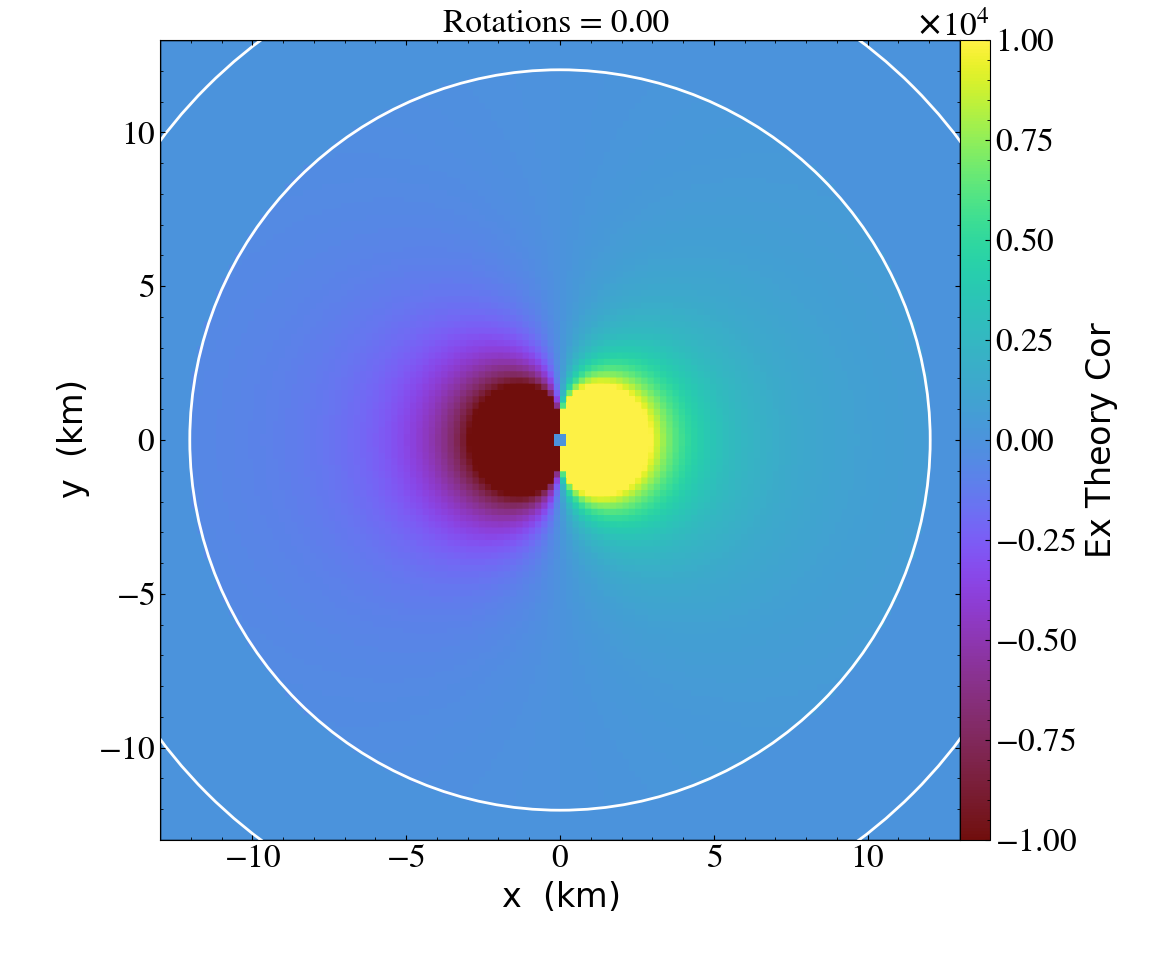

/home/revanathan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(



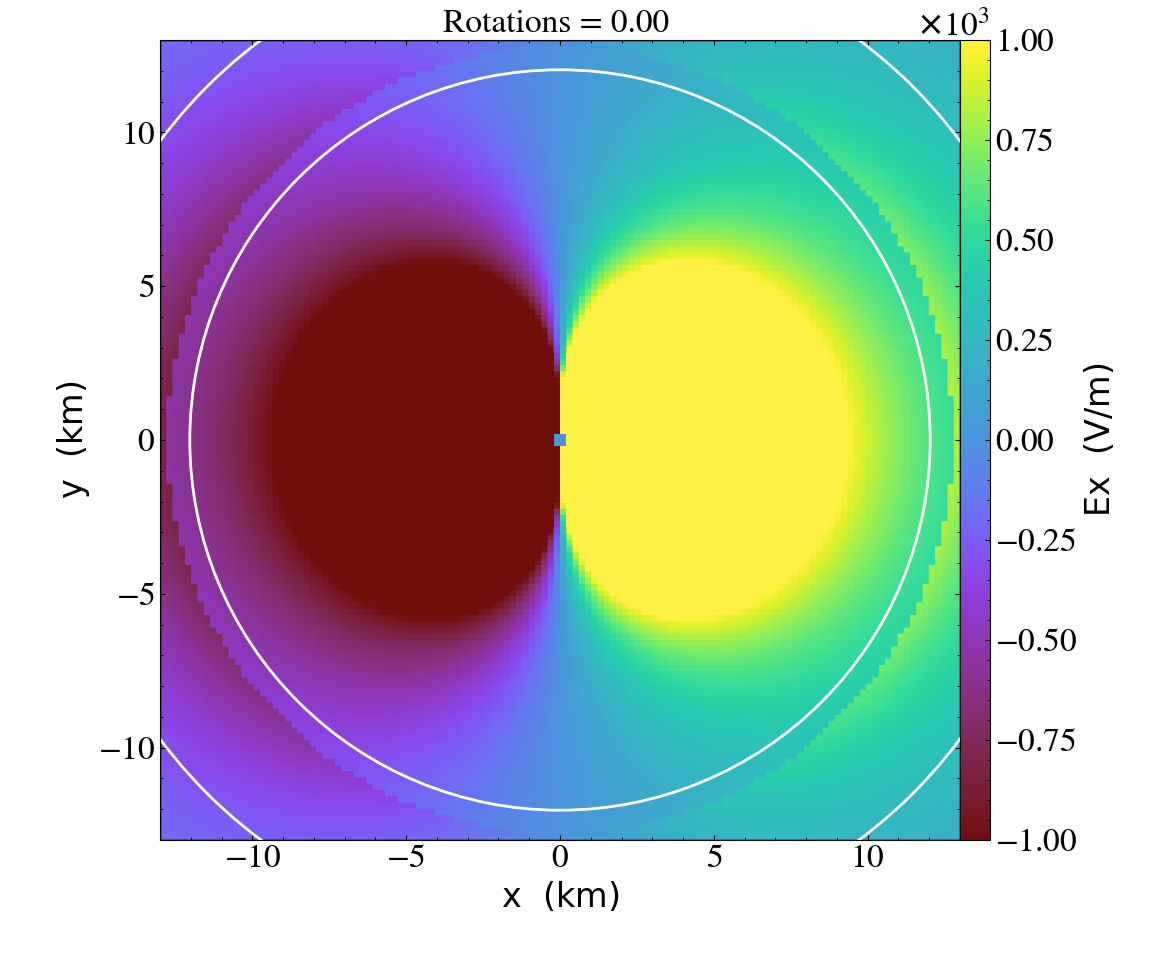

/home/revanathan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(



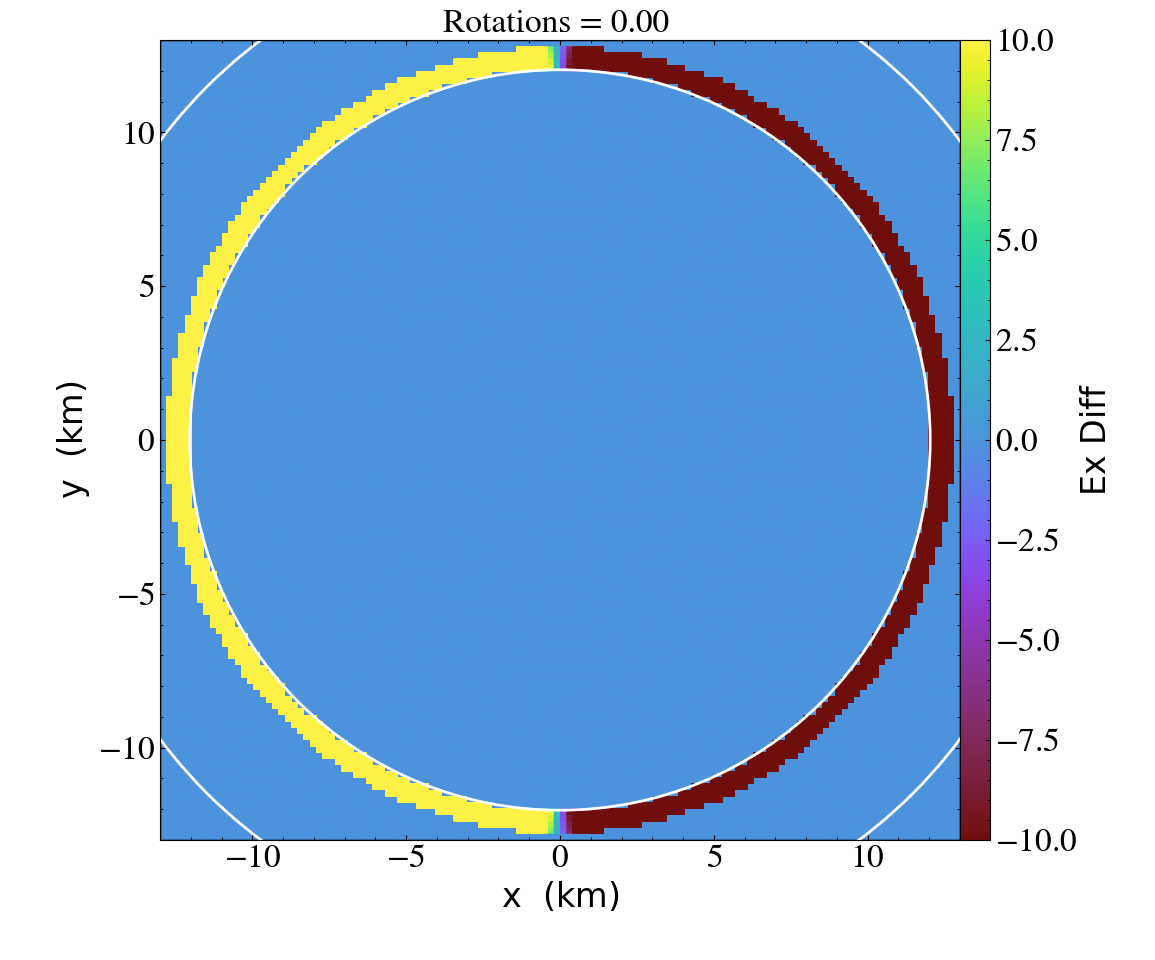


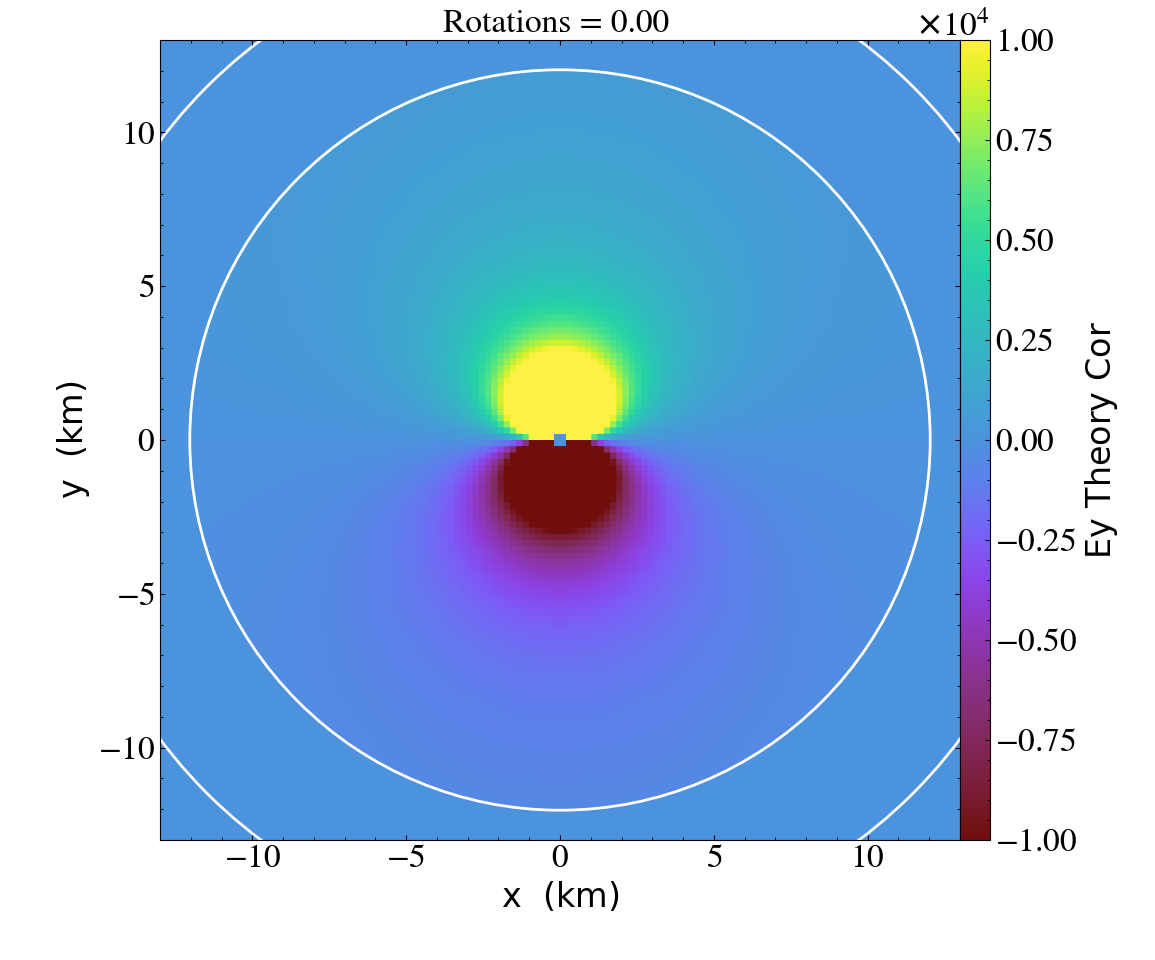


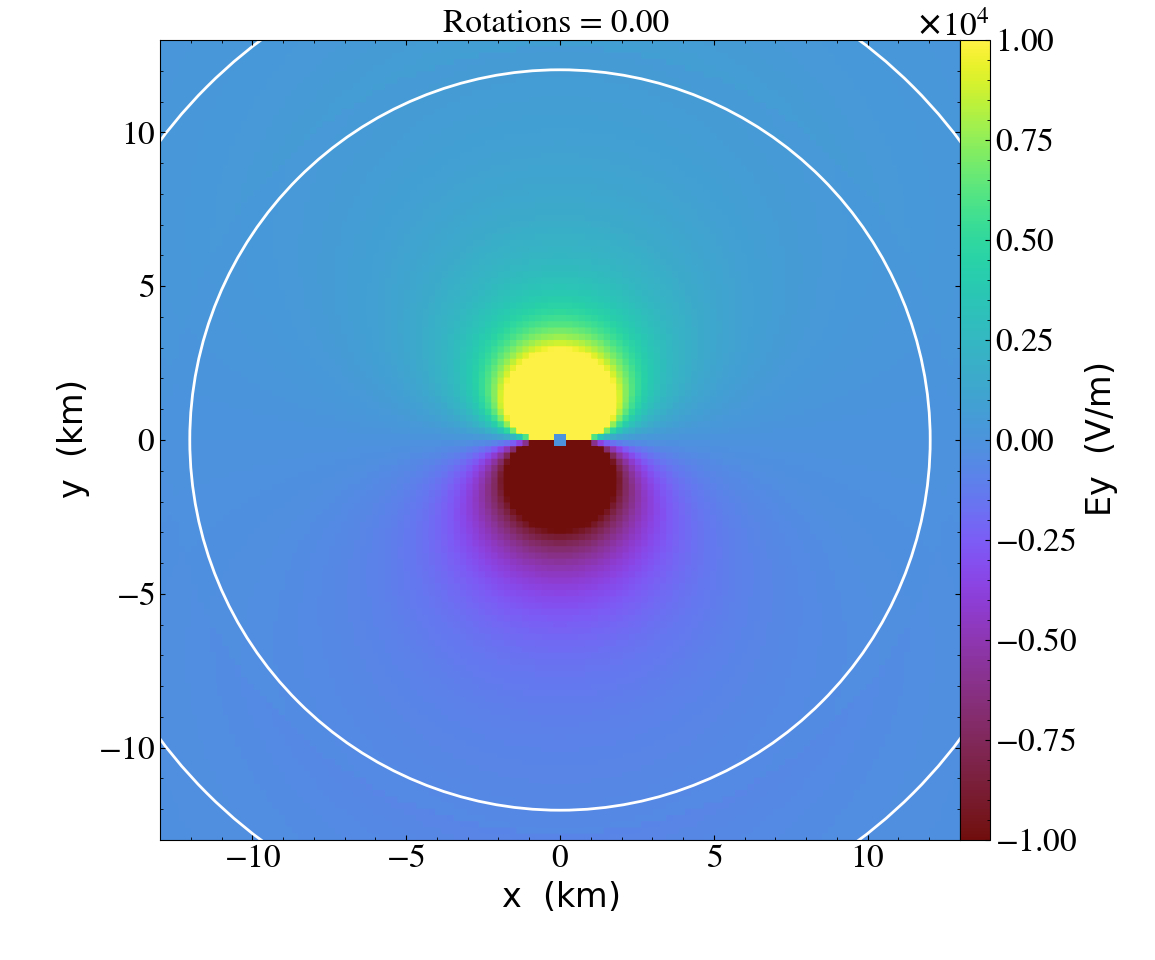


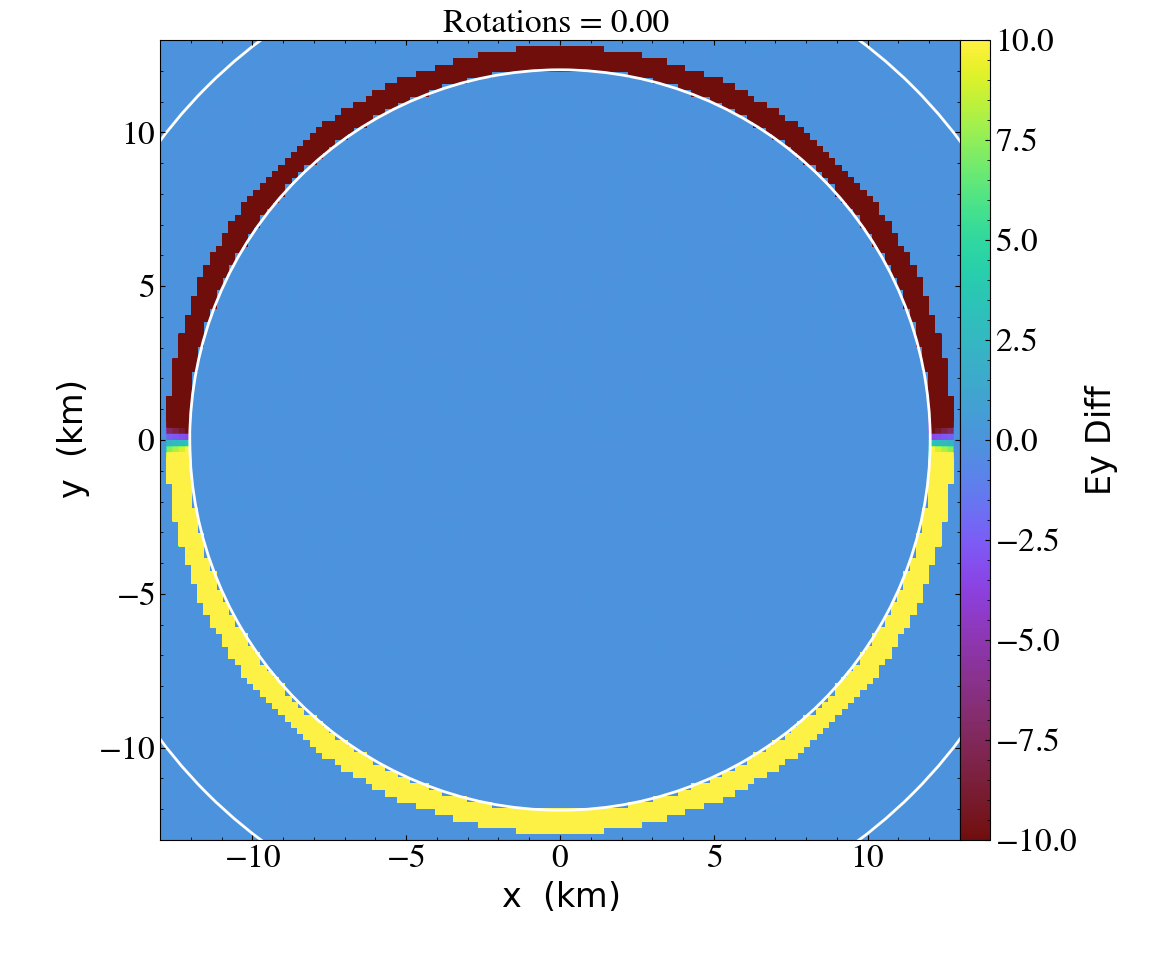


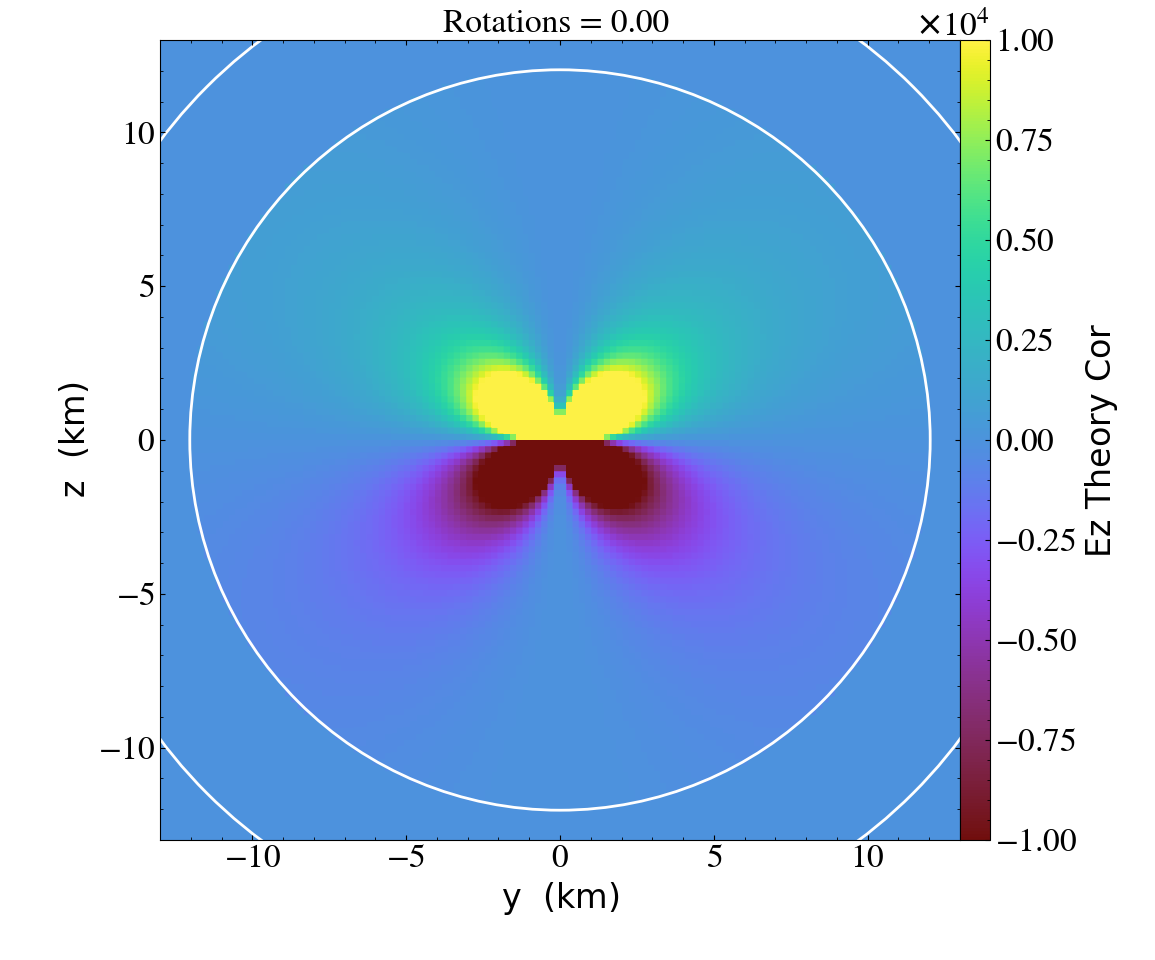


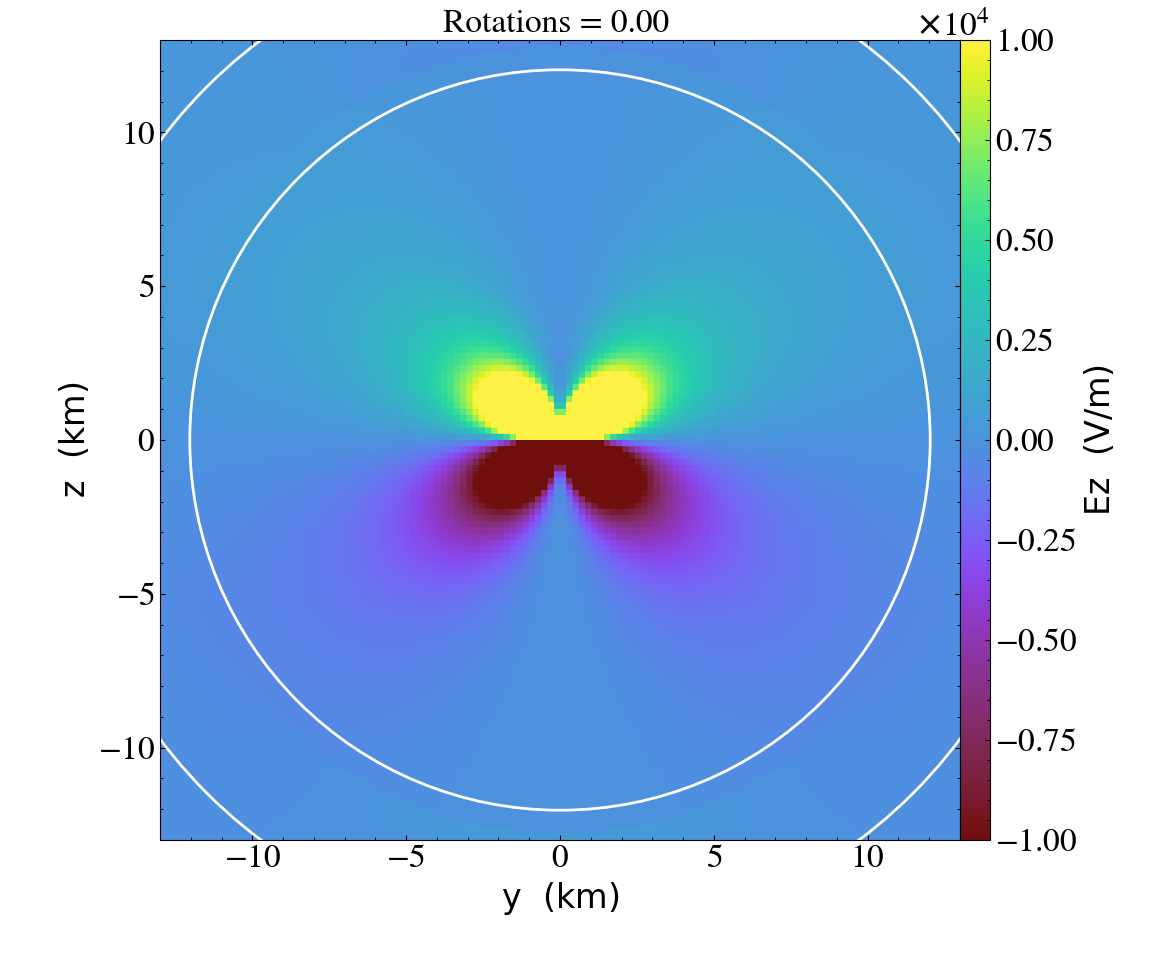


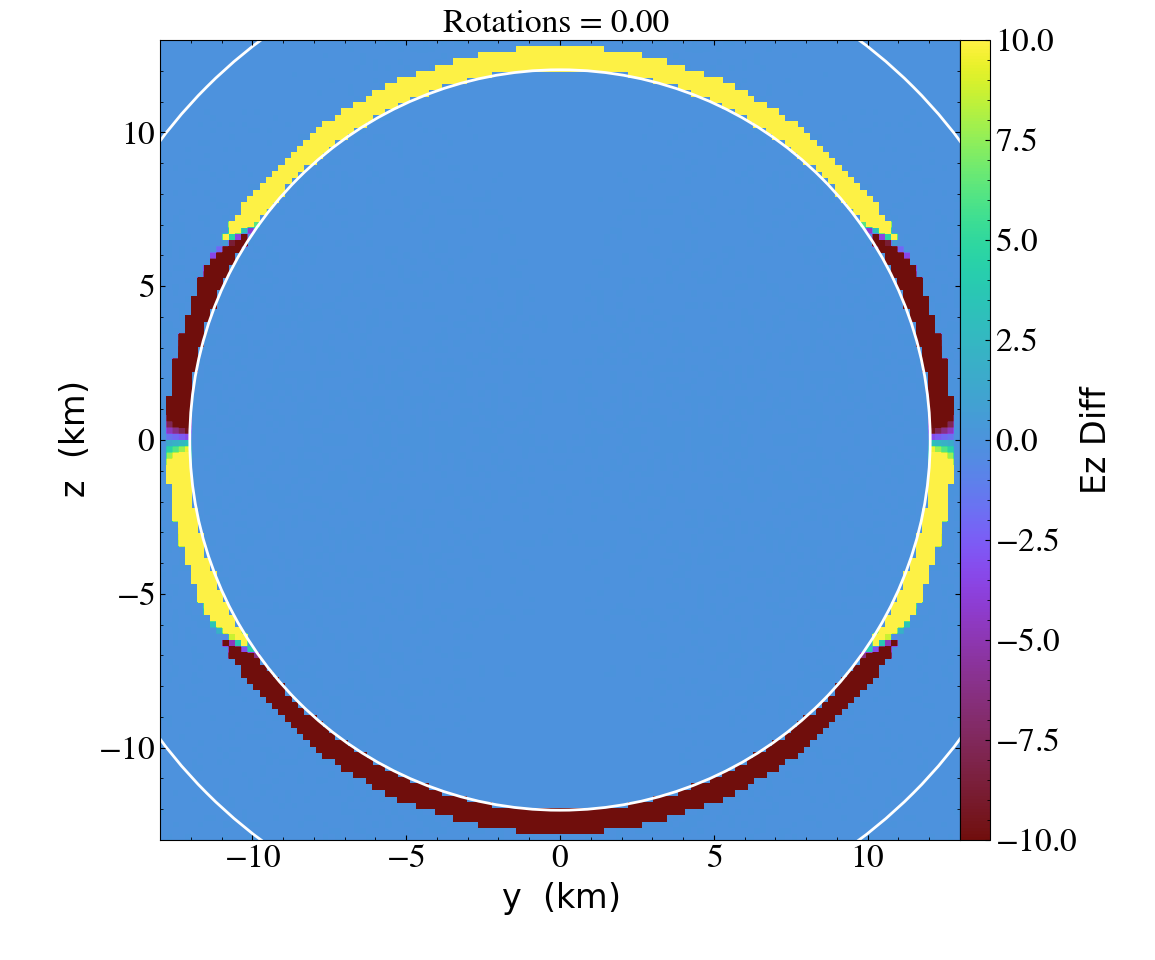

In [9]:
iteration = 0
dt_iter = 8000000

while iteration < 8001 :
    iteration2 = iteration
    from yt.frontends.boxlib.api import AMReXDataset
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    xc = 90000
    yc = 90000
    zc = 90000
    rstar = 12032
    dR = 1400
    ds.force_periodicity
    #ds.periodicity = 3*[True]
    ds.add_field(('boxlib','x_center'),function=x_center,units='m',sampling_type="cell")
    ds.add_field(('boxlib','y_center'),function=y_center,units='m',sampling_type="cell")
    ds.add_field(('boxlib','z_center'),function=z_center,units='m',sampling_type="cell")
    ds.add_field(('boxlib','dR'),function=dR_star,units='',sampling_type="cell")
    ds.add_field(('boxlib','rad'),function=rad,units='m',sampling_type="cell")
    ds.add_field(('boxlib',"r_cl"),function=r_cl,units='m',sampling_type="cell")   
    ds.add_field(('boxlib',"thetaval"),function=thetaval,units='',sampling_type="cell")     
    ds.add_field(('boxlib',"Ex_theory_quad"),function=Ex_theory_quad,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ey_theory_quad"),function=Ey_theory_quad,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ez_theory_quad"),function=Ez_theory_quad,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ex_theory_mono"),function=Ex_theory_mono,units='',sampling_type="cell")    
    ds.add_field(('boxlib',"Ey_theory_mono"),function=Ey_theory_mono,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"Ez_theory_mono"),function=Ez_theory_mono,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ex_theory_cor"),function=Ex_theory_cor,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ey_theory_cor"),function=Ey_theory_cor,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ez_theory_cor"),function=Ez_theory_cor,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ex_total_ext"),function=Ex_total_ext,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ey_total_ext"),function=Ey_total_ext,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Ez_total_ext"),function=Ez_total_ext,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Bx_theory"),function=Bx_theory,units='',sampling_type="cell")    
    ds.add_field(('boxlib',"By_theory"),function=By_theory,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"Bz_theory"),function=Bz_theory,units='',sampling_type="cell")   
    ds.add_field(('boxlib',"EdotB_theory"),function=EdotB_theory,units='',sampling_type="cell")   
    ds.add_field(('boxlib',"EdotB_sim"),function=EdotB_sim,units='',sampling_type="cell")
    ds.add_field(('boxlib',"Bx_diff"),function=Bx_diff,units='',sampling_type="cell")    
    ds.add_field(('boxlib',"By_diff"),function=By_diff,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"Bz_diff"),function=Bz_diff,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"Ex_diff"),function=Ex_diff,units='',sampling_type="cell")    
    ds.add_field(('boxlib',"Ey_diff"),function=Ey_diff,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"Ez_diff"),function=Ez_diff,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"divE_theory"),function=divE_theory,units='',sampling_type="cell")  
    ds.add_field(('boxlib',"Ex_sim_ext"), function=Ex_sim_ext, units='', sampling_type="cell")
    ds.add_field(('boxlib',"Ey_sim_ext"), function=Ey_sim_ext, units='', sampling_type="cell")
    ds.add_field(('boxlib',"Ez_sim_ext"), function=Ez_sim_ext, units='', sampling_type="cell")  
    
    field = ('boxlib','Ex_theory_cor')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
    sl.annotate_grids()
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    #sl.annotate_streamlines(('boxlib','Ex'), ('boxlib',"Ey"), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,-10000,10000)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_cor_theory_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############
    
    field = ('boxlib','Ex')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
    sl.annotate_grids()
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    #sl.annotate_streamlines(('boxlib','Ex'), ('boxlib',"Ey"), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,-1000,1000)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############  
    
    field = ('boxlib','Ex_diff')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
    sl.annotate_grids()
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    #sl.annotate_streamlines(('boxlib','Ex'), ('boxlib',"Ey"), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,-10,10)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_diff_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############    
    
    
    field = ('boxlib','Ey_theory_cor')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10000,10000)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ey_cor_theory_xyplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################  
    
    field = ('boxlib','Ey')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10000,10000)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ey_xyplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################     
    
    field = ('boxlib','Ey_diff')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10,10)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ey_diff_xyplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################     
    
    
    field = ('boxlib','Ez_theory_cor')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10000,10000)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_cor_theory_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles ####################### 
    
    field = ('boxlib','Ez')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10000,10000)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################  
    
    field = ('boxlib','Ez_diff')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10,10)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_diff_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################   
    
 
    
 
    iteration = iteration + dt_iter

In [ ]:
   
    field = ('boxlib','Ey_theory_cor')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-1,1)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################  
    
    field = ('boxlib','Ey')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-1,1)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################          
    

    
    
    field = ('boxlib','Ey_diff')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-1,1)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################  
        
    


    
    field = ('boxlib','Ex')
    sl = yt.SlicePlot(ds,1, field, aspect=1) # Create a sliceplot object
    sl.annotate_grids()
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    #sl.annotate_streamlines(('boxlib','Ex'), ('boxlib',"Ey"), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,0,2000)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############
    
    field = ('boxlib','Ex')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    #sl.annotate_streamlines(('boxlib','Ex'), ('boxlib',"Ey"), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,0,2000)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############
    
    field = ('boxlib','rad')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    #sl.annotate_streamlines(('boxlib','Ex'), ('boxlib',"Ey"), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,0,2000)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############
    
    
    
    field = ('boxlib','Ez')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-3.14,3.14)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################
    
  
    
    field = ('boxlib','Ey')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,0,3.14)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################
    
    
  
    
    field = ('boxlib','Ez_total_ext')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-10000,10000)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################
    
        
    field = ('boxlib','Ez_diff')
    sl = yt.SlicePlot(ds,2, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-0.1,0.1)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ezdiff_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################
    
            
    field = ('boxlib','Ey_diff')
    sl = yt.SlicePlot(ds,0, field, aspect=1) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    #sl.annotate_streamlines(('boxlib','Ey'), ('boxlib','Ez'), plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-0.1,0.1)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([xc,yc,zc], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Eydiff_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################
    

In [ ]:
iteration = 0
dt_iter = 8000000

while iteration < 8001 :
    iteration2 = iteration
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    xc = 90300
    yc = 90000
    zc = 90000
    rstar = 12032
    dR = 350
    ds.periodicity = 3*[True]
    ds.add_field(("rad"),function=rad,units='m',sampling_type="cell")    
    ds.add_field(("r_cl"),function=r_cl,units='m',sampling_type="cell")   
    ds.add_field(("thetaval"),function=thetaval,units='',sampling_type="cell")     
    ds.add_field(("Ex_theory_quad"),function=Ex_theory_quad,units='',sampling_type="cell")
    ds.add_field(("Ey_theory_quad"),function=Ey_theory_quad,units='',sampling_type="cell")
    ds.add_field(("Ez_theory_quad"),function=Ez_theory_quad,units='',sampling_type="cell")
    ds.add_field(("Ex_theory_mono"),function=Ex_theory_mono,units='',sampling_type="cell")    
    ds.add_field(("Ey_theory_mono"),function=Ey_theory_mono,units='',sampling_type="cell")  
    ds.add_field(("Ez_theory_mono"),function=Ez_theory_mono,units='',sampling_type="cell")
    ds.add_field(("Ex_theory_cor"),function=Ex_theory_cor,units='',sampling_type="cell")
    ds.add_field(("Ey_theory_cor"),function=Ey_theory_cor,units='',sampling_type="cell")
    ds.add_field(("Ez_theory_cor"),function=Ez_theory_cor,units='',sampling_type="cell")
    ds.add_field(("Ex_total_ext"),function=Ex_total_ext,units='',sampling_type="cell")
    ds.add_field(("Ey_total_ext"),function=Ey_total_ext,units='',sampling_type="cell")
    ds.add_field(("Ez_total_ext"),function=Ez_total_ext,units='',sampling_type="cell")
    ds.add_field(("Bx_theory"),function=Bx_theory,units='',sampling_type="cell")    
    ds.add_field(("By_theory"),function=By_theory,units='',sampling_type="cell")  
    ds.add_field(("Bz_theory"),function=Bz_theory,units='',sampling_type="cell")   
    ds.add_field(("EdotB_theory"),function=EdotB_theory,units='',sampling_type="cell")   
    ds.add_field(("EdotB_sim"),function=EdotB_sim,units='',sampling_type="cell")
    ds.add_field(("Bx_diff"),function=Bx_diff,units='',sampling_type="cell")    
    ds.add_field(("By_diff"),function=By_diff,units='',sampling_type="cell")  
    ds.add_field(("Bz_diff"),function=Bz_diff,units='',sampling_type="cell")  
    ds.add_field(("Ex_diff"),function=Ex_diff,units='',sampling_type="cell")    
    ds.add_field(("Ey_diff"),function=Ey_diff,units='',sampling_type="cell")  
    ds.add_field(("Ez_diff"),function=Ez_diff,units='',sampling_type="cell")  
    ds.add_field(("divE_theory"),function=divE_theory,units='',sampling_type="cell")  
    ds.add_field(("Ex_sim_ext"), function=Ex_sim_ext, units='', sampling_type="cell")
    ds.add_field(("Ey_sim_ext"), function=Ey_sim_ext, units='', sampling_type="cell")
    ds.add_field(("Ez_sim_ext"), function=Ez_sim_ext, units='', sampling_type="cell")    
    #ds.add_field(("EdotB"),function=EdotB,units='',sampling_type="cell")
    #################### Plot rho on xy plane #################
#    field = 'rho'
#    sl = yt.SlicePlot(ds,2, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
    #sl.annotate_particles(width=(2.e2, 'm'),ptype="plasma_p",col='b',p_size=5.0)
    #sl.annotate_particles(width=(2.e2, 'm'),ptype="plasma_e",col='r',p_size=0.2)
    #sl.annotate_streamlines("Bx", "By", plot_args={"color": "black"})
#    sl.set_zlim(field,-6e-13,6e-13)
#    sl.set_log(field,False)
#    sl.annotate_sphere([xc,yc,zc], radius=rstar,
#                  circle_args={'color':'white', 'linewidth':2})
#    period = ds.current_time.v/1.e-3
#    sl.annotate_title('Rotations = %.2f ' %period)
#    sl.set_font_size(24)
#    sl.show() # Show the plot
#    sl.save(plotfile_path+'/rho_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ########################## plotted rho on xy plane #######################

 
    
    ########### plot Ex with ep particles on eq. plane ##############

    field = 'Ex'
    sl = yt.SlicePlot(ds,2, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    sl.annotate_streamlines("Ex", "Ey", plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,-100,100)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ex_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############
        
    
    ############ Plot Ez on y-z plane with particles ################

    
    
    field = 'Ez_diff'
    sl = yt.SlicePlot(ds,0, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=5.0)
    sl.annotate_streamlines("Ey", "Ez", plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-100,100)
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ez_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################

    field = 'Ez_sim_ext'
    sl = yt.SlicePlot(ds,0, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=2)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=2)
    sl.annotate_streamlines("Ey_sim_ext", "Ez_sim_ext", plot_args={"color": "black"},density=2)
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,-100,100)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Ezwithext_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############
           
    
    field = 'Bx'
    sl = yt.SlicePlot(ds,2, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_p",col='b',p_size=0.5)
#    sl.annotate_particles(width=(1.e2, 'm'),ptype="plasma_e",col='r',p_size=0.2)
    sl.annotate_streamlines("Bx", "By", plot_args={"color": "black"})
    #sl.set_zlim(field,-8e-13,8e-13)
    sl.set_log(field,False)
    sl.set_zlim(field,-1e-6,1e-6)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2}) 
    sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Bx_ep_eq_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ##################### plotted EX on equatorial plne with particles ###############

   
    
    ############ Plot Ez on y-z plane with particles ################

    field = 'Bz'
    sl = yt.SlicePlot(ds,0, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_p",col='b',p_size=1.0)
#    sl.annotate_particles(width=(1.e1, 'm'),ptype="plasma_e",col='r',p_size=1.0)
    sl.annotate_streamlines("By", "Bz", plot_args={"color": "black"})    
    #sl.set_zlim(field,-9e-30,9e-30)
    sl.set_zlim(field,-1e-6,1e-6)    
    #sl.annotate_grids() # Show gridsi
    sl.set_log(field,False)
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/Bz_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################ plotted Ez on yz plance with particles #######################
    


    ##### update iteration #########
    iteration = iteration + dt_iter

In [ ]:
iteration = 400
dt_iter = 400

while iteration < 16001 :
    iteration2 = iteration
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    xc = 90000
    yc = 90000
    zc = 90000
    rstar = 12032
    dR = 700
    ds.periodicity = 3*[True]  
############# Plot rho on yz plane without particles #################
    field = 'rho'
    sl = yt.SlicePlot(ds,0, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
    sl.set_zlim(field,-6e-13,6e-13)
    #sl.set_zlim(field,-20,20)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=rstar+3.*dR,
                  circle_args={'color':'white', 'linewidth':2})
    sl.set_log(field,False)
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/rho_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################## plottted rho on yz plane ############################
    
    
    ############# Plot rho on yz plane without particles #################
    field = 'rho_plasma_p'
    sl = yt.SlicePlot(ds,0, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
    sl.set_zlim(field,-6e-13,6e-13)
    #sl.set_zlim(field,-20,20)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.set_log(field,False)
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/rhop_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    
        
    ############# Plot rho on yz plane without particles #################
    field = 'rho_plasma_e'
    sl = yt.SlicePlot(ds,0, field, aspect=1,center=[xc,yc,zc]) # Create a sliceplot object
    sl.set_zlim(field,-1e-13,1e-13)
    #sl.set_zlim(field,-20,20)
    #sl.annotate_grids() # Show gridsi
    sl.annotate_sphere([xc,yc,zc], radius=rstar,
                  circle_args={'color':'white', 'linewidth':2})
    sl.set_log(field,False)
    period = ds.current_time.v/1.e-3
    sl.annotate_title('Rotations = %.2f ' %period)
    sl.set_font_size(24)
    sl.show() # Show the plot
    sl.save(plotfile_path+'/rhoe_yzplane_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    ################## plottted rho on yz plane ############################

    iteration = iteration + dt_iter
        

In [ ]:
iteration = 100
dt_iter = 100

while iteration < 16001 :
    iteration2 = iteration
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    xc = 90000
    yc = 90000
    zc = 90000
    rstar = 12032
    dR = 700
    ds.periodicity = 3*[True]    
    ########### Scatter plot of particles everywhere in the domain #############
    p = yt.ParticlePlot(ds,('plasma_p', 'particle_position_y'),('plasma_p', 'particle_position_z'),('plasma_p','particle_position_x'))
    p.annotate_particles(width=2.e3,ptype="plasma_p",col='b',p_size=2.5)
    p.annotate_particles(width=2.e3,ptype="plasma_e",col='r',p_size=2.5)
    p.hide_colorbar()
    period = ds.current_time.v/1.e-3
    p.annotate_title('Rotations = %.2f ' %period)
    p.set_font_size(24)
    p.show()
    p.save(plotfile_path+'/ep_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    iteration = iteration + dt_iter
    

In [ ]:
iteration = 1000
dt_iter = 200

while iteration < 16001 :
    iteration2 = iteration
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    xc = 90000
    yc = 90000
    zc = 90000
    rstar = 12032
    dR = 700
    ds.periodicity = 3*[True]    
    ########### Scatter plot of particles everywhere in the domain #############
    p = yt.ParticlePlot(ds,('plasma_p', 'particle_position_x'),('plasma_p', 'particle_position_y'),('plasma_p','particle_position_x'))
    p.annotate_particles(width=2.e4,ptype="plasma_p",col='b',p_size=2.5)
    p.annotate_particles(width=2.e4,ptype="plasma_e",col='r',p_size=2.5)
    p.hide_colorbar()
    period = ds.current_time.v/1.e-3
    p.annotate_title('Rotations = %.2f ' %period)
    p.set_font_size(24)
    p.show()
    p.save(plotfile_path+'/ep_eqplt'+'_'+'{:05d}'.format(iteration)+'.png')
    iteration = iteration + dt_iter
    

In [ ]:
iteration = 200
dt_iter = 200

while iteration < 16001 :
    iteration2 = iteration
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    xc = 90000
    yc = 90000
    zc = 90000
    rstar = 12032
    dR = 234
    ds.periodicity = 3*[True]    
    ########### Scatter plot of particles everywhere in the domain #############
    p = yt.ParticlePlot(ds,('plasma_p', 'particle_position_y'),('plasma_p', 'particle_position_z'),('plasma_p','particle_position_x'))
    p.annotate_particles(width=2.e2,ptype="plasma_p",col='b',p_size=2.5)
    p.annotate_particles(width=2.e2,ptype="plasma_e",col='r',p_size=2.5)
    p.hide_colorbar()
    period = ds.current_time.v/1.e-3
    p.annotate_title('Rotations = %.2f ' %period)
    p.set_font_size(24)
    p.show()
    p.save(plotfile_path+'/ep_plt'+'_'+'{:05d}'.format(iteration)+'.png')
    iteration = iteration + dt_iter
    

In [ ]:
iteration = 1000
dt_iter = 1000

while iteration < 8001 :
    iteration2 = iteration
    ds2 = yt.load( plotfile_path2+'plt'+str(iteration2).zfill(5) ) # Create a dataset object
    ds = yt.load( plotfile_path+'plt'+str(iteration).zfill(5) ) # Create a dataset object
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    #x = ad0['plasma_p','particle_position_x'].to_ndarray()
    p_wt = ad0['plasma_p','particle_weight'].to_ndarray()
    e_wt = ad0['plasma_e','particle_weight'].to_ndarray()
    TotalQ=(p_wt.shape[0]*p_wt[0] - e_wt.shape[0]*e_wt[0])*1.602e-19
    print(TotalQ)
    iteration = iteration + dt_iter

In [ ]:
29-18

In [ ]:
40-29

In [ ]:
52-40


In [ ]:
64-52

In [ ]:
74-63